# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
units = "imperial" #Fahrenheit
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [218]:
#today = datetime(today.year, today.month,today.day)
today = datetime.now().strftime("%m/%d/%y")

In [206]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [207]:
city_id = []
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_id.append(response['id'])
    except KeyError:
        print(f"Removing {city}")
        cities.remove(city)

Removing phumi samraong
Removing sentyabrskiy
Removing barentsburg
Removing illoqqortoormiut
Removing arrecife
Removing taolanaro
Removing koboldo
Removing nizhneyansk
Removing vaitupu
Removing maneadero
Removing mananara
Removing tumannyy
Removing patharia
Removing bandar-e torkaman
Removing svetlyy
Removing pagman
Removing kismayo
Removing attawapiskat
Removing huajuapan
Removing pakwach
Removing shchelyayur
Removing tawkar
Removing viligili
Removing malwan
Removing tubruq
Removing sorvag
Removing tsihombe
Removing tabiauea
Removing bafra
Removing samusu
Removing machali
Removing lolua
Removing khrustalnyy
Removing bardiyah
Removing toliary
Removing armacao dos buzios
Removing devyatka
Removing korla
Removing meyungs
Removing wulanhaote
Removing katha
Removing ondorhaan
Removing saryshagan
Removing belushya guba
Removing mys shmidta
Removing bengkulu
Removing saleaula
Removing barbar
Removing temaraia
Removing berbera
Removing olafsvik
Removing duz
Removing nguiu
Removing grand centr

In [181]:
len(city_id)

483

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [182]:
temp = []
clouds = []
country = []
dt = []
humidity = []
lat = []
long = []
temp_max = []
wind_speed = []
new_city = []
query_url = f"{url}appid={api_key}&units={units}&id="

for city in city_id:
    response = requests.get(query_url + str(city)).json()
    print(f"Processing city {response['name']}")
    print(f"{query_url + str(city)}")
    new_city.append(response['name'])
    temp.append(response['main']['temp'])
    clouds.append(response['clouds']['all'])
    country.append(response['sys']['country'])   
    dt.append(response['dt'])
    humidity.append(response['main']['humidity'])
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp_max.append(response['main']['temp_max'])
    wind_speed.append(response['wind']['speed'])
    #print((response['id']))
    #time.sleep(3)
    #print(f"The temperature information received is: {response['main']['temp']}")
print("Data Retrieval Complete") 


Processing city Pisco
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3932145
Processing city Acapulco de Juarez
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3533462
Processing city Yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=6185377
Processing city Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3448903
Processing city Khatanga
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2022572
Processing city Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=4030556
Processing city Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3833367
Processing city Te Anau


Processing city Kolpino
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=546105
Processing city Butaritari
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2110227
Processing city Maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3421982
Processing city Hilo
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=5855927
Processing city Luderitz
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3355672
Processing city Malinyi
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=155016
Processing city Upernavik
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3418910
Processing city Tasiilaq
http://api.openweath

Processing city Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=6170031
Processing city Kurumkan
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2021188
Processing city Tula
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=480562
Processing city Coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3893629
Processing city Ligayan
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1706466
Processing city Nadym
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1498087
Processing city Isiro
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=215771
Processing city Chuy
http://api.openweathermap.org/

Processing city Carballo
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3126369
Processing city Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3388847
Processing city São Domingos do Capim
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3388869
Processing city Ancud
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3899695
Processing city San Fernando
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3573739
Processing city Nosy Varika
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1058080
Processing city Abancay
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3948642
Processing city

Processing city Umea
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=602150
Processing city Hamilton
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3573197
Processing city Bolbec
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3031871
Processing city Bull Savanna
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3491161
Processing city Barra do Corda
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3406318
Processing city Khvoy
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=126972
Processing city Khombole
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2249901
Processing city Tripoli
http://api.openwea

Processing city Kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1242110
Processing city Qingdao
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1797929
Processing city Dunedin
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2191562
Processing city Riachao
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3390581
Processing city Pirojpur
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1185138
Processing city Los Zacatones
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3974149
Processing city Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1267390
Processing city Bratsk
http://api.open

Processing city Gazli
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1513990
Processing city Puyo
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3652584
Processing city Oschersleben
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2856930
Processing city Klyuchi
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1503153
Processing city Islamkot
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=1176608
Processing city Viedma
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3832899
Processing city Gusau
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2339937
Processing city Brae
http://api.openweathermap.org

Processing city Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=5354943
Processing city Okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=2122605
Processing city Selma
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=5394329
Processing city Maldonado
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3441894
Processing city San Ramon
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=3616584
Processing city el Prat de Llobregat
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=6356195
Processing city Gimli
http://api.openweathermap.org/data/2.5/weather?appid=0ef37c2fc9faae3692be3f9a82dc71e3&units=imperial&id=5961417
Processing city Camacha
http:

483

In [189]:
len(wind_speed)

483

In [184]:
weather_dict = {
    "City": new_city,
    "Cloudiness": clouds,
    "Country":country,
    "Date":dt,
    "Humidity":humidity,
    "Lat": lat,
    "Long": long, 
    "Max Temp": temp_max,
    "Wind Speed": wind_speed
    }

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Pisco,90,PE,1548716400,30,-13.70,-76.22,71.60,9.17
1,Acapulco de Juarez,5,MX,1548715440,61,16.86,-99.89,82.40,16.11
2,Yellowknife,40,CA,1548716400,67,62.46,-114.35,-23.81,3.15
3,Sao Joao da Barra,0,BR,1548719942,96,-21.64,-41.05,81.27,14.45
4,Khatanga,48,RU,1548719399,56,71.97,102.50,-32.13,2.82


In [ ]:
weather_data.to_csv("weather_data.csv", index=False, header=True)

In [186]:
df = pd.DataFrame(weather_dict)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

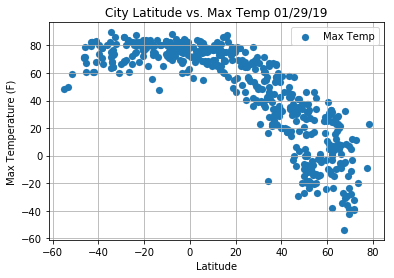

In [220]:
fig, ax = plt.subplots()

#colormap = cm.rainbow
#colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(df['city']))]

#for i,c in enumerate(colorlist):

x = df['Lat']
y = df['Max Temp']
#   l = df['city'][i]

ax.scatter(x, y, s=50, linewidth=0.1)

ax.legend()

plt.title(f"City Latitude vs. Max Temp {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("../Images/TemperatureInWorldCities.png")
plt.show()

In [ ]:
#Analysis: Max temp pretty consistent South up to the equator then begins dropping steadily 

#### Latitude vs. Humidity Plot

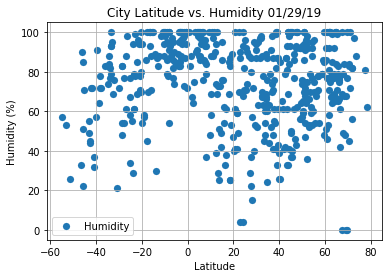

In [221]:
fig, ax = plt.subplots()

#colormap = cm.rainbow
#colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(df['city']))]

#for i,c in enumerate(colorlist):

x = df['Lat']
y = df['Humidity']
#   l = df['city'][i]

ax.scatter(x, y, s=50, linewidth=0.1)

ax.legend()

plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("../Images/Humidity.png")
plt.show()

In [ ]:
#Analysis: less humid right at the equator

#### Latitude vs. Cloudiness Plot

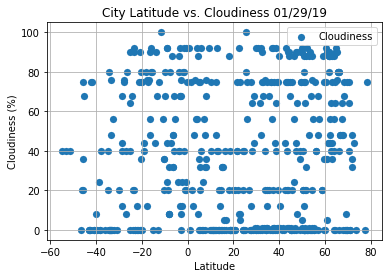

In [222]:
fig, ax = plt.subplots()


#colormap = cm.rainbow
#colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(df['city']))]

#for i,c in enumerate(colorlist):

x = df['Lat']
y = df['Cloudiness']
#   l = df['city'][i]

ax.scatter(x, y, s=50, linewidth=0.1)

ax.legend()

plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("../Images/Cloudiness.png")
plt.show()

In [ ]:
#Analysis: clouds pretty even split of latitudes and percent cloudiness

#### Latitude vs. Wind Speed Plot

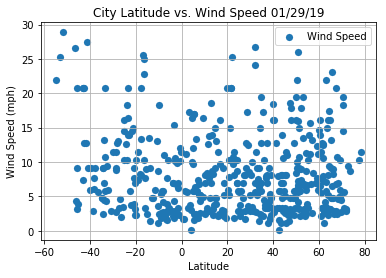

In [223]:
fig, ax = plt.subplots()


#colormap = cm.rainbow
#colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(df['city']))]

#for i,c in enumerate(colorlist):

x = df['Lat']
y = df['Wind Speed']
#   l = df['city'][i]

ax.scatter(x, y, s=50, linewidth=0.1)

ax.legend()

plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

# Save the figure
plt.savefig("../Images/Wind Speed.png")
plt.show()

In [ ]:
#Analysis: higher wind speeds are seen at all latitudes, but less so around the equator